# Python goals... exploring a football data-set using Pandas

In [1]:
# Import any packages
import pandas as pd
import matplotlib

# Make the plots appear inline
%matplotlib inline

## Plot the number of International matches that took place each year?

Read in the `results.csv` file which is saved in the same directory as this notebook and save it to a Pandas DataFrame named `results_df`.

In [2]:
results_df = pd.read_csv('results.csv')

The columns included in `results.csv` are:

* `date` - date of the match
* `home_team` - the name of the home team
* `away_team` - the name of the away team
* `home_score` - full-time home team score including extra time, not including penalty-shootouts
* `away_score` - full-time away team score including extra time, not including penalty-shootouts
* `tournament` - the name of the tournament
* `city` - the name of the city/town/administrative unit where the match was played
* `country` - the name of the country where the match was played
* `neutral` - boolean column indicating whether the match was played at a neutral venue

More information can be found in the [GitHub repo](https://github.com/martj42/international_results) for this data-set.

Look at the first 5 records of `results_df` by using using the Pandas `head()` method.

In [3]:
results_df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


Each row represents a single International football match.

Look at the last 5 records of `results_df` by using using the Pandas `tail()` method.

In [4]:
results_df.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
42178,2021-06-08,Morocco,Ghana,1,0,Friendly,Rabat,Morocco,False
42179,2021-06-08,Mozambique,Eswatini,1,1,Friendly,Maputo,Mozambique,False
42180,2021-06-08,Poland,Iceland,2,2,Friendly,Poznan,Poland,False
42181,2021-06-08,Senegal,Cape Verde,2,0,Friendly,Thiès,Senegal,False
42182,2021-06-08,Spain,Lithuania,4,0,Friendly,Leganés,Spain,False


Familiarise ourselves with the data-set by checking the number of rows and columns using the Pandas `shape` attribute.

In [5]:
results_df.shape

(42183, 9)

Check the datatypes of the columns using the Pandas `dtypes` attribute.

In [6]:
results_df.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

The `date` column is of type `object`, which isn't very useful and does not make use of the fact that the column is actually a date, we can select the column as a Pandas Series to inspect.

In [7]:
results_df['date']

0        1872-11-30
1        1873-03-08
2        1874-03-07
3        1875-03-06
4        1876-03-04
            ...    
42178    2021-06-08
42179    2021-06-08
42180    2021-06-08
42181    2021-06-08
42182    2021-06-08
Name: date, Length: 42183, dtype: object

Now use `pd.to_datetime()` on the `date` column in `results_df` to convert to a `datetime` datatype Series.

In [8]:
pd.to_datetime(results_df['date'])

0       1872-11-30
1       1873-03-08
2       1874-03-07
3       1875-03-06
4       1876-03-04
           ...    
42178   2021-06-08
42179   2021-06-08
42180   2021-06-08
42181   2021-06-08
42182   2021-06-08
Name: date, Length: 42183, dtype: datetime64[ns]

Assign the Series to a new column to `results_df` called `date_time`.

In [9]:
results_df['date_time'] = pd.to_datetime(results_df['date'])

Check that the new column has the correct datatype.

In [10]:
results_df.dtypes

date                  object
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
date_time     datetime64[ns]
dtype: object

Through the use of the `dt` namespace, convenient attributes such as `year` can be extracted.

In [11]:
results_df['date_time'].dt.year

0        1872
1        1873
2        1874
3        1875
4        1876
         ... 
42178    2021
42179    2021
42180    2021
42181    2021
42182    2021
Name: date_time, Length: 42183, dtype: int64

Count the occurance of each `year` by using Pandas `value_counts()`.

In [12]:
results_df['date_time'].dt.year.value_counts()

2019    1155
2008    1092
2011    1083
2004    1066
2000    1026
        ... 
1878       2
1872       1
1874       1
1875       1
1873       1
Name: date_time, Length: 150, dtype: int64

The index is the `year` and the value is the count relating to it, it is sorted in descending order by default.

In order to plot we must sort by the index using Pandas `sort_index()`.

In [13]:
results_df['date_time'].dt.year.value_counts().sort_index()

1872       1
1873       1
1874       1
1875       1
1876       2
        ... 
2017     958
2018     905
2019    1155
2020     286
2021     282
Name: date_time, Length: 150, dtype: int64

By simply using Pandas `plot()` we can visualise the nuber of international matches each year (the default plot type is a line).

<AxesSubplot:>

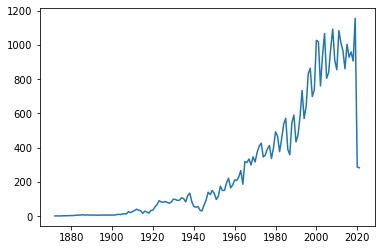

In [14]:
results_df['date_time'].dt.year.value_counts().sort_index().plot()

Although the plot could certainly use some visual enhancements, a simple Pandas one-liner is able to convey the number of matches that took place each year!

## Filtering the time-series for more fine grained detail

It would also be insightful to take a look at a narrower range of International matches. 

Create a boolean Series from the `date_time` column.

In [15]:
results_df['date_time'].dt.year >= 2014

0        False
1        False
2        False
3        False
4        False
         ...  
42178     True
42179     True
42180     True
42181     True
42182     True
Name: date_time, Length: 42183, dtype: bool

Slice the Series and only keep rows that are `True`.

In [16]:
results_df['date_time'].dt.year[results_df['date_time'].dt.year >= 2014]

35806    2014
35807    2014
35808    2014
35809    2014
35810    2014
         ... 
42178    2021
42179    2021
42180    2021
42181    2021
42182    2021
Name: date_time, Length: 6377, dtype: int64

As previously, use Pandas `value_counts()` to count the occurances each year.

In [17]:
results_df['date_time'].dt.year[results_df['date_time'].dt.year >= 2014].value_counts()

2019    1155
2015    1003
2017     958
2016     928
2018     905
2014     860
2020     286
2021     282
Name: date_time, dtype: int64

Then sort it by the index using Pandas `sort_index()`.

In [18]:
results_df['date_time'].dt.year[results_df['date_time'].dt.year >= 2014].value_counts().sort_index()

2014     860
2015    1003
2016     928
2017     958
2018     905
2019    1155
2020     286
2021     282
Name: date_time, dtype: int64

Now using Pandas `plot()` to visualise the Series.

<AxesSubplot:>

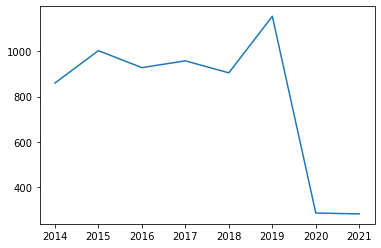

In [19]:
results_df['date_time'].dt.year[results_df['date_time'].dt.year >= 2014].value_counts().sort_index().plot()

There is a large drop in the final two years. 2020 is low mainly due to COVID and 2021 is partly COVID and partly an unfinished year. 

We can see this using Pandas `max()` on the `date_time` column.

In [20]:
results_df['date_time'].max()

Timestamp('2021-06-08 00:00:00')

## Which Tournament type is the most exciting?

The most exciting International tournament could be defined in many ways, but one way to define it may be to investigate the goals scored! 

To begin with, create a new column `total_score` which calculates the `home_score` + `away_score` to give the total number of goals in each International match.

In [21]:
results_df['total_score'] = results_df['home_score'] + results_df['away_score']

Now check a random 5 records from the DataFrame to validate the calculation.

In [22]:
results_df[['total_score', 'home_score', 'away_score']].sample(5)

,total_score,home_score,away_score
31047,2,1,1
1889,2,1,1
10112,3,1,2
33842,1,1,0
13956,3,2,1


For each tournament we can ue Pandas `groupby()` to calculate the average number of match goals and determine the most exciting tournament based on this metric!

Firstly we will filter to tournaments with >= 100 matches in the DataFrame to ensure that there is a reasonable sample size.

Use Pandas `value_counts()` on the `tournament` column to return a Series indexed by `tournament` with the value being the number of matches in the tournament.

In [23]:
results_df['tournament'].value_counts()

Friendly                                17273
FIFA World Cup qualification             7378
UEFA Euro qualification                  2582
African Cup of Nations qualification     1719
FIFA World Cup                            900
                                        ...  
OSN Cup                                     4
World Unity Cup                             4
Atlantic Heritage Cup                       2
AFF Championship qualification              2
Copa América qualification                  2
Name: tournament, Length: 112, dtype: int64

Assign this to a variable called `tournament_count`.

In [24]:
tournament_count = results_df['tournament'].value_counts()

See which tournaments have over 100 matches by using boolean indexing as previously.

In [25]:
tournament_count[tournament_count >= 100]

Friendly                                17273
FIFA World Cup qualification             7378
UEFA Euro qualification                  2582
African Cup of Nations qualification     1719
FIFA World Cup                            900
Copa América                              813
AFC Asian Cup qualification               724
African Cup of Nations                    690
CECAFA Cup                                620
CFU Caribbean Cup qualification           606
British Championship                      505
Merdeka Tournament                        503
Gulf Cup                                  380
AFC Asian Cup                             370
Island Games                              350
Gold Cup                                  327
UEFA Nations League                       304
AFF Championship                          293
COSAFA Cup                                292
UEFA Euro                                 286
Nordic Championship                       283
African Nations Championship      

Now assign the index of this Series to a variable called `most_common_tournaments`.

In [26]:
most_common_tournaments = tournament_count[tournament_count >= 100].index

Check that `most_common_tournaments` is what we expect.

In [27]:
most_common_tournaments

Index(['Friendly', 'FIFA World Cup qualification', 'UEFA Euro qualification',
       'African Cup of Nations qualification', 'FIFA World Cup',
       'Copa América', 'AFC Asian Cup qualification', 'African Cup of Nations',
       'CECAFA Cup', 'CFU Caribbean Cup qualification', 'British Championship',
       'Merdeka Tournament', 'Gulf Cup', 'AFC Asian Cup', 'Island Games',
       'Gold Cup', 'UEFA Nations League', 'AFF Championship', 'COSAFA Cup',
       'UEFA Euro', 'Nordic Championship', 'African Nations Championship',
       'CFU Caribbean Cup', 'Amílcar Cabral Cup', 'King's Cup',
       'South Pacific Games', 'UNCAF Cup', 'Korea Cup', 'Confederations Cup',
       'SAFF Cup', 'International Cup', 'CCCF Championship', 'UAFA Cup',
       'EAFF Championship', 'CONCACAF Nations League', 'Oceania Nations Cup',
       'CONIFA World Football Cup', 'Windward Islands Tournament',
       'AFC Challenge Cup'],
      dtype='object')

Filter `results_df` using Pandas `isin()` to retain rows in `most_common_tournaments` using boolean indexing and assign to a variable called `most_common_tournaments_df`.

In [28]:
most_common_tournaments_df = results_df[results_df.tournament.isin(most_common_tournaments)]

Check the `shape` of this to confirm we have subsetted the data-set.

In [29]:
most_common_tournaments_df.shape

(39985, 11)

Now use Pandas `groupby()` in conjunction with Pandas `agg()` to find the average number of `total_score` per `tournament`.

In [30]:
most_common_tournaments_df.groupby('tournament')['total_score'].agg(['count', 'mean', 'median'])

,count,mean,median
tournament,,,
AFC Asian Cup,370,2.667568,2
AFC Asian Cup qualification,724,3.341160,3
AFC Challenge Cup,100,2.660000,2
AFF Championship,293,3.430034,3
African Cup of Nations,690,2.421739,2
African Cup of Nations qualification,1719,2.375218,2
African Nations Championship,264,2.541667,2
Amílcar Cabral Cup,235,2.246809,2
British Championship,505,3.520792,3


Sort it by `mean` using Pandas `sort_values()` and use Pandas `tail()` to view the top 5 tournaments.

In [31]:
most_common_tournaments_df.groupby('tournament')['total_score'].agg(['count', 'mean', 'median']).sort_values('mean').tail()

,count,mean,median
tournament,,,
International Cup,127,4.173228,4
CONIFA World Football Cup,101,4.198020,4
Oceania Nations Cup,101,4.336634,4
CCCF Championship,123,4.463415,4
South Pacific Games,205,5.912195,4


Plot this as a horizontal bar chart using Pandas `plot(kind='barh')`. Notice that we tweak the code slightly to use Pandas `mean()` instead of Pandas `agg()` to make it easier to just plot the mean.

<AxesSubplot:ylabel='tournament'>

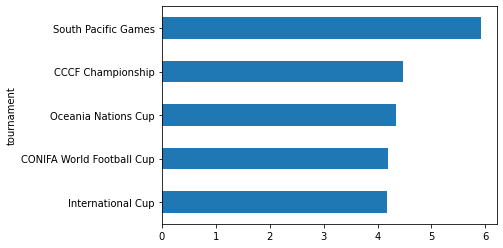

In [32]:
most_common_tournaments_df.groupby('tournament')['total_score'].mean().sort_values().tail().plot(kind='barh')

## Which scores are most common at the Euros?

Lets look at the score distribution of matches in the Euros! 

Start by filtering `results_df` using boolean indexing.

In [33]:
euro_df = results_df[results_df['tournament'] == 'UEFA Euro']

Check we have the correct data by using Pandas `head()` and `tail()`.

In [34]:
euro_df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,date_time,total_score
4747,1960-07-06,Czechoslovakia,Russia,0,3,UEFA Euro,Marseille,France,True,1960-07-06,3
4748,1960-07-06,France,Yugoslavia,4,5,UEFA Euro,Paris,France,False,1960-07-06,9
4750,1960-07-09,France,Czechoslovakia,0,2,UEFA Euro,Marseille,France,False,1960-07-09,2
4755,1960-07-10,Russia,Yugoslavia,2,1,UEFA Euro,Paris,France,True,1960-07-10,3
5644,1964-06-17,Denmark,Russia,0,3,UEFA Euro,Barcelona,Spain,True,1964-06-17,3


In [35]:
euro_df.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,date_time,total_score
38181,2016-07-02,Germany,Italy,1,1,UEFA Euro,Bordeaux,France,True,2016-07-02,2
38184,2016-07-03,France,Iceland,5,2,UEFA Euro,Saint-Denis,France,False,2016-07-03,7
38186,2016-07-06,Portugal,Wales,2,0,UEFA Euro,Lyon,France,True,2016-07-06,2
38187,2016-07-07,France,Germany,2,0,UEFA Euro,Marseille,France,False,2016-07-07,2
38188,2016-07-10,France,Portugal,0,1,UEFA Euro,Saint-Denis,France,False,2016-07-10,1


Pefect, the Euros are every 4 years normally but last years is missing due to COVID.

Lets check if the mean score has changed over the years. We use similar syntax to before but ensuring we are group by the year not the whole `date_time`!

<AxesSubplot:xlabel='date_time'>

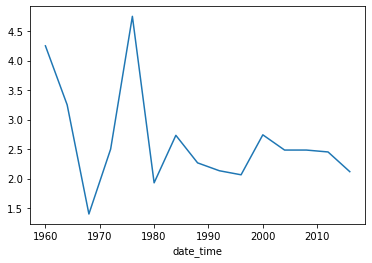

In [36]:
euro_df.groupby(euro_df['date_time'].dt.year)['total_score'].mean().plot()

Looks like there was quite a bit of variation prior to 1980, so we will filter them out using boolean indexing and create a new Pandas DataFrame called `recent_euro_df`.

In [37]:
recent_euro_df = euro_df[euro_df['date_time'].dt.year >= 1980]

Again check using `head()` and `tail()` that we have the correct data.

In [38]:
recent_euro_df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,date_time,total_score
11292,1980-06-11,Czechoslovakia,Germany,0,1,UEFA Euro,Rome,Italy,True,1980-06-11,1
11293,1980-06-11,Netherlands,Greece,1,0,UEFA Euro,Naples,Italy,True,1980-06-11,1
11294,1980-06-12,Belgium,England,1,1,UEFA Euro,Turin,Italy,True,1980-06-12,2
11296,1980-06-12,Italy,Spain,0,0,UEFA Euro,Milan,Italy,False,1980-06-12,0
11301,1980-06-14,Germany,Netherlands,3,2,UEFA Euro,Naples,Italy,True,1980-06-14,5


In [39]:
recent_euro_df.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,date_time,total_score
38181,2016-07-02,Germany,Italy,1,1,UEFA Euro,Bordeaux,France,True,2016-07-02,2
38184,2016-07-03,France,Iceland,5,2,UEFA Euro,Saint-Denis,France,False,2016-07-03,7
38186,2016-07-06,Portugal,Wales,2,0,UEFA Euro,Lyon,France,True,2016-07-06,2
38187,2016-07-07,France,Germany,2,0,UEFA Euro,Marseille,France,False,2016-07-07,2
38188,2016-07-10,France,Portugal,0,1,UEFA Euro,Saint-Denis,France,False,2016-07-10,1


We want to ensure we count the scores correctly.

* When `recent_euro_df['neutral'] == True` then whether or not the team is home or away is irrelevant to the score (they are technically both away)

* When `recent_euro_df['neutral'] == False` then the `home_score` and `away_score` order matters.

We will start by using boolean indexing to subset a copy of `recent_euro_df` with only neutral matches.

In [40]:
neutral_recent_euro_df = recent_euro_df[recent_euro_df['neutral']].copy() # Notice we don't have to include == True

Now create new columns (`min_score` and `max_score`) to order the scoreline logically.

In [41]:
neutral_recent_euro_df['min_score'] = neutral_recent_euro_df[['home_score', 'away_score']].min(axis=1)
neutral_recent_euro_df['max_score'] = neutral_recent_euro_df[['home_score', 'away_score']].max(axis=1)

Check a random 5 records fromt the DataFrame to validate the new columns.

In [42]:
neutral_recent_euro_df[['home_score', 'away_score', 'min_score', 'max_score']].sample(5)

,home_score,away_score,min_score,max_score
14998,0,1,0,1
38121,1,1,1,1
26721,0,1,0,1
13098,2,1,1,2
19674,0,1,0,1


Use Pandas `groupby()` on `min_score` and `max_score` with Pandas `size()` to get the number of matches for each score.

In [43]:
neutral_recent_euro_df.groupby(['min_score', 'max_score']).size()

min_score  max_score
0          0            22
           1            42
           2            28
           3            16
           4             3
           5             2
1          1            27
           2            36
           3            10
           4             3
2          2             4
           3            11
           4             2
3          3             3
           4             1
dtype: int64

We can convert this into something more asthetically pleasing by using Pandas `unstack(fill_value=0)` to pivot the levels in the table and fill the empty cells with 0.

In [44]:
neutral_recent_euro_df.groupby(['min_score', 'max_score']).size().unstack(fill_value=0)

max_score,0,1,2,3,4,5
min_score,,,,,,
0,22,42,28,16,3,2
1,0,27,36,10,3,0
2,0,0,4,11,2,0
3,0,0,0,3,1,0


Gradient fill the background based on the number of matches using `style` and `background_gradient(axis=None)` to fill based on both axis at once.

In [45]:
neutral_recent_euro_df.groupby(['min_score', 'max_score']).size().unstack(fill_value=0).style.background_gradient(axis=None)

max_score,0,1,2,3,4,5
min_score,,,,,,
0,22,42,28,16,3,2
1,0,27,36,10,3,0
2,0,0,4,11,2,0
3,0,0,0,3,1,0


We can see the most common score for a neutral match is 0-1 (or 1-0).

Now repeat the analysis when `recent_euro_df['neutral'] == False` and the `home_score` and `away_score` order matters.

Start by using boolean indexing to subset a copy of `recent_euro_df` with only non-neutral matches.

In [46]:
non_neutral_recent_euro_df = recent_euro_df[~recent_euro_df['neutral']].copy()

Use Pandas `groupby()` on `home_score` and `away_score` with Pandas `size()` to get the number of matches for each score.

In [47]:
non_neutral_recent_euro_df.groupby(['home_score', 'away_score']).size()

home_score  away_score
0           0             5
            1             7
            2             3
1           0             5
            1             8
            2             3
2           0             8
            1             6
            2             1
            3             1
3           0             1
            2             3
4           1             1
5           0             1
            2             1
6           1             1
dtype: int64

We can convert this into something more asthetically pleasing by using Pandas `unstack(fill_value=0)` to pivot the levels in the table and fill the empty cells with 0.

In [48]:
non_neutral_recent_euro_df.groupby(['home_score', 'away_score']).size().unstack(fill_value=0)

away_score,0,1,2,3
home_score,,,,
0,5,7,3,0
1,5,8,3,0
2,8,6,1,1
3,1,0,3,0
4,0,1,0,0
5,1,0,1,0
6,0,1,0,0


Gradient fill the background based on the number of matches using style and background_gradient(axis=None) to fill based on both axis at once.

In [49]:
non_neutral_recent_euro_df.groupby(['home_score', 'away_score']).size().unstack(fill_value=0).style.background_gradient(axis=None)

away_score,0,1,2,3
home_score,,,,
0,5,7,3,0
1,5,8,3,0
2,8,6,1,1
3,1,0,3,0
4,0,1,0,0
5,1,0,1,0
6,0,1,0,0


The most common scorelines for non-neutral matches are 2-0 and 1-1, but the sample size is much less than for neutral matches.